## 랜덤 포레스트 분류모형

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd
from GraphicSetting import *
import hds_stats as hds

### 실습 데이터셋 준비

In [2]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/Python/MachineLearning/code'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['Used_Cars_Price.z', 'Univ_Admit.z', 'Cereal_Dataset.z']

In [5]:
# 분류모형 실습 데이터셋을 호출합니다.
df = joblib.load(filename = 'Univ_Admit.z')

### 입력변수 행렬과 목표변수 벡터로 분리

In [6]:
# df의 처음 5행을 출력합니다.
df.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,Fail,380.0,3.61,0,0,1,0
1,Pass,660.0,3.67,0,0,1,0
2,Pass,800.0,4.00,1,0,0,0
3,Pass,640.0,3.19,0,0,0,1
4,Fail,520.0,2.93,0,0,0,1


In [7]:
# 목표변수명을 yvar에 할당합니다.
yvar = 'admit'

In [8]:
# 데이터프레임을 입력변수 행렬과 목표변수 벡터로 분리합니다.
X = df.drop(columns = yvar)
y = df[yvar].copy()

### 실습 데이터셋 분할

In [9]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [10]:
# 전체 데이터셋의 70%를 훈련셋, 30%를 검증셋으로 분할합니다.
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.3, random_state = 0, stratify = y
)

### 훈련셋과 검증셋 확인

In [11]:
# 훈련셋 입력변수 행렬의 크기를 확인합니다.
X_train.shape

(1180, 6)

In [12]:
# 검증셋 입력변수 행렬의 크기를 확인합니다.
X_valid.shape

(507, 6)

In [13]:
# 훈련셋 목표변수의 범주별 상대도수를 확인합니다.
y_train.value_counts(normalize = True)

admit
Fail    0.688983
Pass    0.311017
Name: proportion, dtype: float64

In [14]:
# 검증셋 목표변수의 범주별 상대도수를 확인합니다.
y_valid.value_counts(normalize = True)

admit
Fail    0.690335
Pass    0.309665
Name: proportion, dtype: float64

### 랜덤 포레스트 분류모형 적합

In [15]:
# 관련 라이브러리를 호출합니다.
from sklearn.ensemble import RandomForestClassifier

In [16]:
# 랜덤 포레스트 분류모형을 설정합니다.
model = RandomForestClassifier(
    n_estimators = 50,
    max_features = 3,
    oob_score = True,
    min_samples_split = 2,
    min_samples_leaf = 1,
    random_state = 0
)

In [17]:
# 훈련셋으로 랜덤 포레스트 분류모형을 적합합니다.
model.fit(X = X_train, y = y_train)

RandomForestClassifier(max_features=3, n_estimators=50, oob_score=True,
                       random_state=0)

In [18]:
# 랜덤 포레스트 분류모형의 파라미터를 확인합니다.
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [19]:
# 랜덤 포레스트 분류모형의 훈련셋 정확도를 확인합니다.
model.score(X = X_train, y = y_train)

0.8991525423728813

In [20]:
# 랜덤 포레스트 분류모형의 검증셋 정확도를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.7357001972386588

### OOB 정확도 시각화

In [21]:
# 반복문을 실행할 나무모형 개수의 범위를 지정합니다.
ntrees = np.arange(1, 51, 1)

In [22]:
# OOB 정확도를 저장할 빈 리스트를 생성합니다.
scores = []

In [23]:
# 반복문으로 나무모형 개수를 바꿔가면서 OOB 정확도를 리스트에 추가합니다.
for ntree in ntrees:
    model.set_params(n_estimators = ntree)
    model.fit(X = X_train, y = y_train)
    scores.append(model.oob_score_)

/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/hdsceokevin/ve311/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:578: UserW

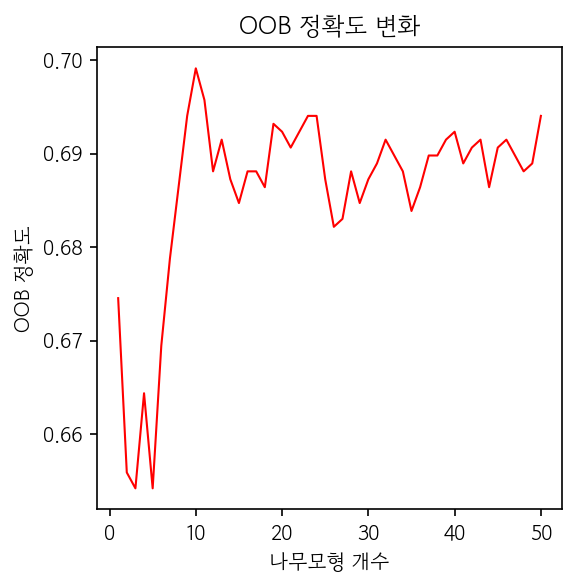

In [24]:
# OOB 정확도로 선 그래프를 그립니다.
sns.lineplot(x = ntrees, y = scores, color = 'red', lw = 1)
plt.title(label = 'OOB 정확도 변화')
plt.xlabel(xlabel = '나무모형 개수')
plt.ylabel(ylabel = 'OOB 정확도');

### 랜덤 포레스트 분류모형 특성 중요도

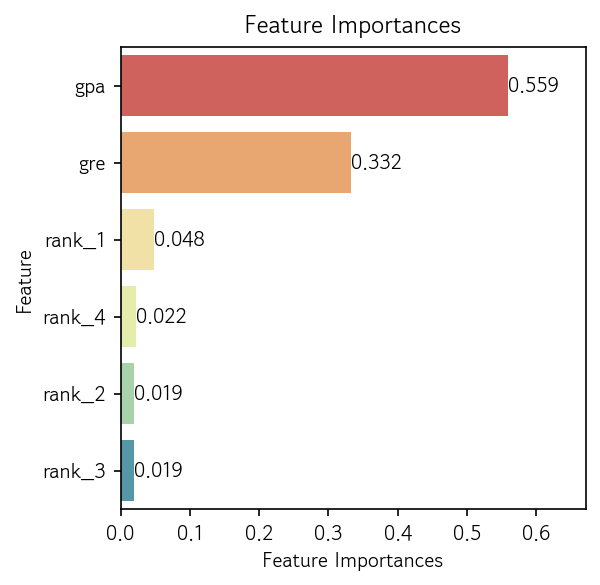

In [25]:
# 랜덤 포레스트 분류모형 특성 중요도로 막대 그래프를 그립니다.
hds.ml.plot_feature_importance(model = model, pal = 'Spectral')

### 분류모형 성능 평가

In [26]:
# 랜덤 포레스트 분류모형의 검증셋 추정확률을 생성합니다.
y_vprob1 = model.predict_proba(X = X_valid)

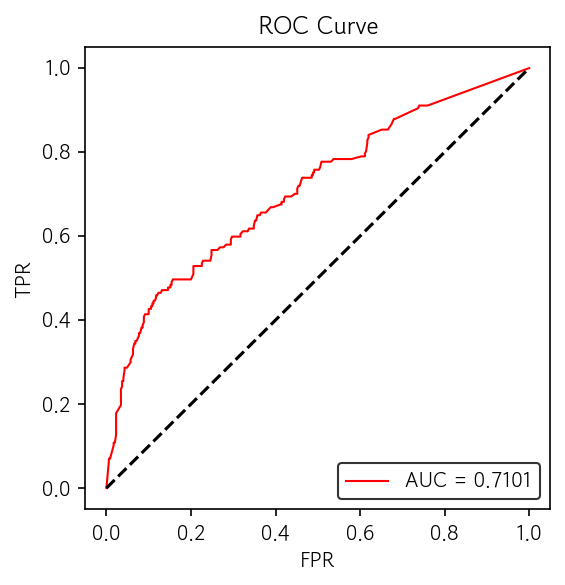

In [27]:
# 랜덤 포레스트 분류모형의 ROC 곡선을 그립니다.
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1, color = 'red')

In [28]:
# 랜덤 포레스트 분류모형의 검증셋 추정값을 생성합니다.
y_vpred1 = model.predict(X = X_valid)

In [29]:
# 랜덤 포레스트 분류모형의 혼동행렬 리포트를 출력합니다.
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred1)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,295,79,374
Pass,55,78,133
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7888    0.8429    0.8149       350
        Pass     0.5865    0.4968    0.5379       157

    accuracy                         0.7357       507
   macro avg     0.6876    0.6698    0.6764       507
weighted avg     0.7261    0.7357    0.7291       507



## End of Document